# LOF-based anomaly detection

In [3]:
import numpy as np
import pickle 
from matplotlib import pyplot as plt 

font = {'family' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

trajectory_file = open("trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
#v_vec = np.array(trajs['v_vec'])
#a_vec = np.array(trajs['a_vec'])
# remove the mean component from y_vec 
# y_mean = np.array(trajs['y_mean'])
del trajs
trajectory_file.close()
del trajectory_file

Naively we are going to run LOF at each time instances on several synthetic data

## Experiment 1: overspeeding vehicle

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


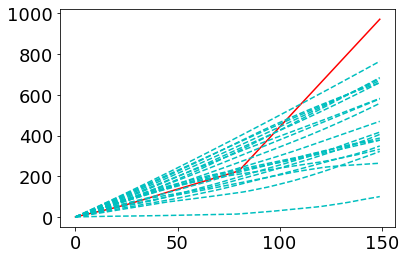

In [4]:
synth_traj = y_vec[30,:].copy() # take a random trajectory in the dataset
synth_traj[80:] = synth_traj[80] + 10.8 * np.arange(synth_traj.shape[0] - 80)
plt.plot(synth_traj, 'r')
for i in range(20):
    plt.plot(y_vec[i,:], 'c--')

In [5]:
from sklearn.neighbors import LocalOutlierFactor

In [6]:
def log_stat_check(preds):
    fp = 0
    fn = 0
    for i in range(preds.shape[0]):
        if i<80 and preds[i]==-1:
            fp+=1
        if i>80 and preds[i]==1:
            fn+=1
    print('FP {:d} ({:.2f}%), FN: {:d} ({:.2f}%)'.format(fp, fp/preds.shape[0] * 100, fn, fn/preds.shape[0] * 100))

k=3
FP 8 (5.33%), FN: 41 (27.33%)
k=4
FP 4 (2.67%), FN: 63 (42.00%)
k=5
FP 5 (3.33%), FN: 54 (36.00%)
k=6
FP 5 (3.33%), FN: 33 (22.00%)


Text(0, 0.5, 'Label')

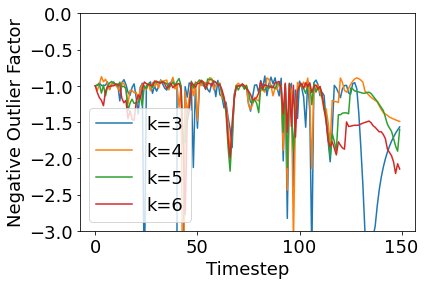

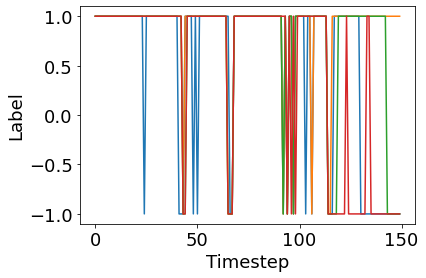

In [9]:
traj_length = synth_traj.shape[0]
for kneighbor in range(3,7):
    pred_scores = np.zeros((traj_length))
    preds = np.zeros((traj_length))
    for i in range(traj_length):
        clf = LocalOutlierFactor(n_neighbors=kneighbor)
        dset = y_vec[:,i]
        dset = np.concatenate((dset, np.array([synth_traj[i]])))
        pred = clf.fit_predict(dset.reshape((-1,1)))
        preds[i] = pred[-1]
        pred_score = clf.negative_outlier_factor_[-1] # outlier score of synth_traj, the lower the more abnormal
        pred_scores[i] = pred_score
    plt.figure(0)
    plt.plot(preds, label='k=' + str(kneighbor))
    plt.figure(1)
    plt.plot(pred_scores, label='k=' + str(kneighbor))
    print('k={:d}'.format(kneighbor))
    log_stat_check(preds)
plt.legend()
plt.ylim((-3,0))
plt.xlabel('Timestep')
plt.ylabel('Negative Outlier Factor')
plt.figure(0)
plt.xlabel('Timestep')
plt.ylabel('Label')

In [10]:
# Save the two curves for cross-check with Bayes Factor method
np.savez('synth1.npz', data = synth_traj)

## Experiment 2: "wiggling" trajectory

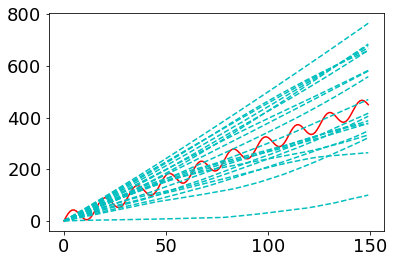

In [11]:
synth_traj = 30 * np.sin(0.4 * np.arange(traj_length)) + 3 * np.arange(traj_length) # take a random trajectory in the dataset
plt.plot(synth_traj, 'r')
for i in range(20):
    plt.plot(y_vec[i,:], 'c--')

In [12]:
def log_stat_check2(preds):
    fp = 0
    fn = 0
    for i in range(preds.shape[0]):
        if preds[i]==1:
            fp+=1
    fn = preds.shape[0] - fp
    print('FP {:d} ({:.2f}%), FN: {:d} ({:.2f}%)'.format(fp, fp/preds.shape[0] * 100, fn, fn/preds.shape[0] * 100))

k=3
FP 115 (76.67%), FN: 35 (23.33%)
k=4
FP 120 (80.00%), FN: 30 (20.00%)
k=5
FP 127 (84.67%), FN: 23 (15.33%)
k=6
FP 135 (90.00%), FN: 15 (10.00%)


Text(0, 0.5, 'Label')

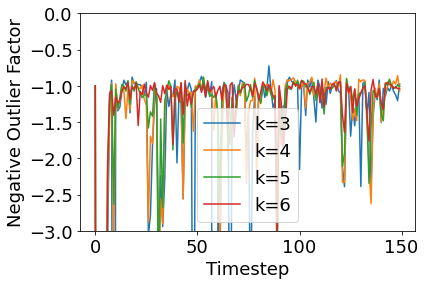

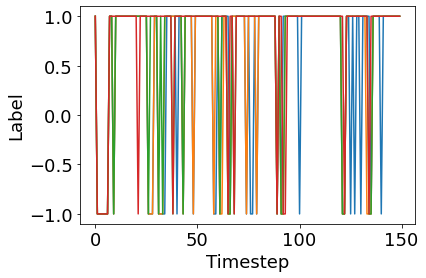

In [14]:
traj_length = synth_traj.shape[0]
for kneighbor in range(3,7):
    pred_scores = np.zeros((traj_length))
    preds = np.zeros((traj_length))
    for i in range(traj_length):
        clf = LocalOutlierFactor(n_neighbors=kneighbor)
        dset = y_vec[:,i]
        dset = np.concatenate((dset, np.array([synth_traj[i]])))
        pred = clf.fit_predict(dset.reshape((-1,1)))
        preds[i] = pred[-1]
        pred_score = clf.negative_outlier_factor_[-1] # outlier score of synth_traj, the lower the more abnormal
        pred_scores[i] = pred_score
    plt.figure(0)
    plt.plot(preds, label='k=' + str(kneighbor))
    plt.figure(1)
    plt.plot(pred_scores, label='k=' + str(kneighbor))
    print('k={:d}'.format(kneighbor))
    log_stat_check2(preds)
plt.legend()
plt.ylim((-3,0))
plt.xlabel('Timestep')
plt.ylabel('Negative Outlier Factor')
plt.figure(0)
plt.xlabel('Timestep')
plt.ylabel('Label')

In [14]:
# Save the two curves for cross-check with Bayes Factor method
np.savez('synth2.npz', data = synth_traj)